Stock Regressions Dan Le 3/12/2019

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split

import pandas as pd
import datetime as dt
import requests

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
API_URL = 'https://api.iextrading.com/1.0'

In [5]:
API_URL

'https://api.iextrading.com/1.0'

In [6]:
STOCK = 'AMZN'

In [7]:
STOCK


'AMZN'

In [29]:
url = f'{API_URL}/stock/{STOCK}/chart/5y'
print(url)
res = requests.get(url)
data =res.json()
df = pd.DataFrame(data)

df['date'] = df['date'].apply((lambda x: pd.Timestamp(x)))


https://api.iextrading.com/1.0/stock/AMZN/chart/5y


In [9]:
df.head(10)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,1.82,0.000000,0.493,370.64,2014-03-12,371.160,"Mar 12, 14",363.61,366.40,2219663,2219663,368.1900
1,0.87,0.002347,0.235,371.51,2014-03-13,383.110,"Mar 13, 14",368.08,376.62,6829047,6829047,376.2120
2,2.23,0.008364,0.600,373.74,2014-03-14,378.568,"Mar 14, 14",371.55,372.80,4402220,4402220,374.9219
3,1.30,0.011871,0.348,375.04,2014-03-17,378.850,"Mar 17, 14",374.88,375.72,2306821,2306821,376.6811
4,3.73,0.021935,0.995,378.77,2014-03-18,379.000,"Mar 18, 14",375.00,377.32,2483508,2483508,376.9566
5,-5.54,0.006988,-1.463,373.23,2014-03-19,379.000,"Mar 19, 14",369.42,378.77,2646687,2646687,368.7304
6,-4.26,-0.004506,-1.141,368.97,2014-03-20,373.000,"Mar 20, 14",366.22,370.64,2558460,2558460,368.9194
7,-8.35,-0.027034,-2.263,360.62,2014-03-21,372.840,"Mar 21, 14",358.40,371.00,5417935,5417935,323.1707
8,-8.77,-0.050696,-2.432,351.85,2014-03-24,361.500,"Mar 24, 14",348.60,360.09,4879627,4879627,353.5495
9,2.86,-0.042980,0.813,354.71,2014-03-25,358.970,"Mar 25, 14",348.84,354.03,4455703,4455703,353.5358


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null datetime64[ns]
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 118.0+ KB


In [11]:
X_train, X_test,Y_train, Y_test = train_test_split(df['date'], df['close'], test_size=.2, random_state=42)

In [12]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Amazon Stocks')

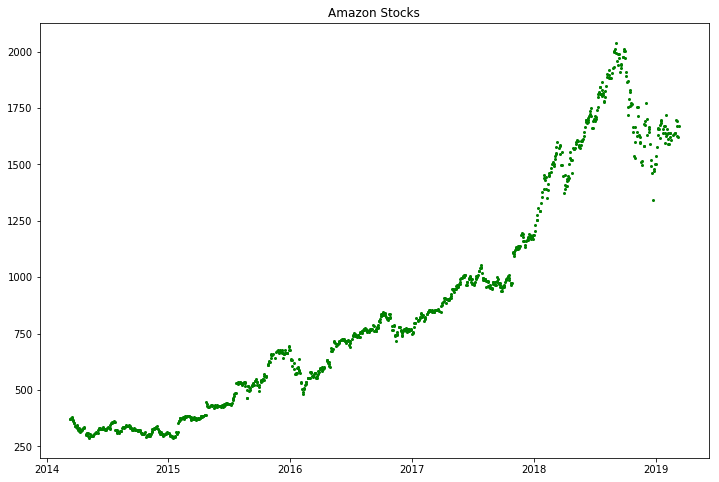

In [13]:
plt.plot(X_train,Y_train,'go', markersize=2)
plt.title('Amazon Stocks')

Text(0.5, 1.0, 'Test set')

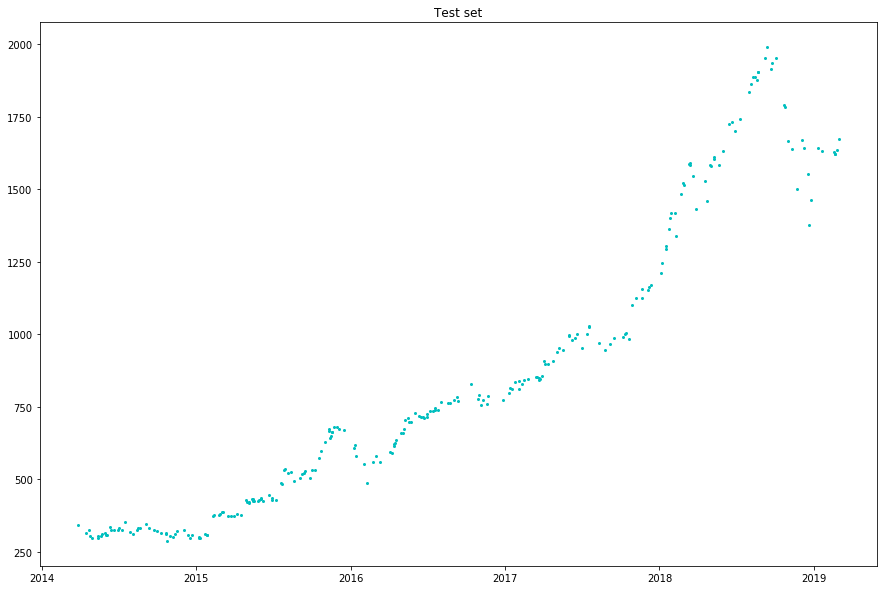

In [14]:
plt.figure(figsize=(15,10))
plt.plot(X_test, Y_test, 'co', markersize=2)
plt.title('Test set')

In [15]:
X_years = [matplotlib.dates.date2num(x) for x in X_train]

In [17]:
coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 3)

In [18]:
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)

In [19]:
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

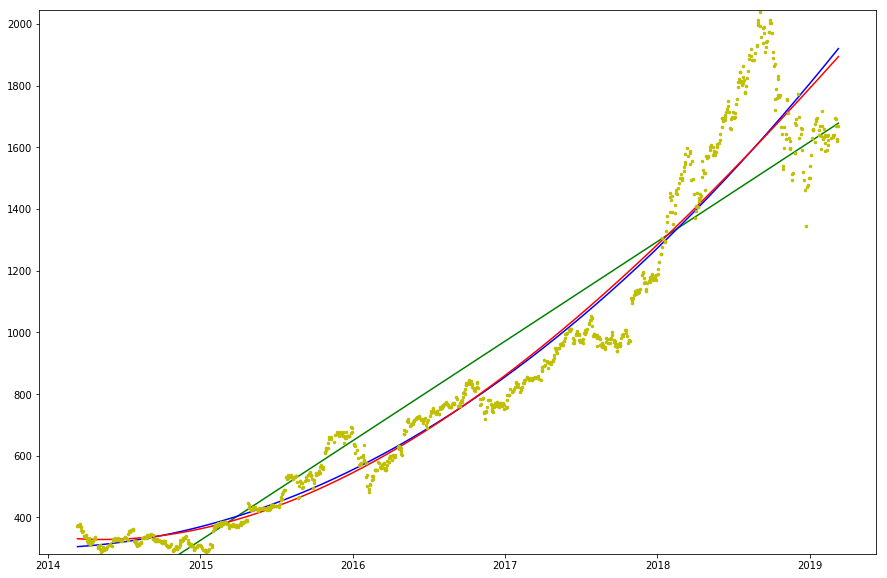

In [20]:
plt.figure(figsize=(15,10))
plt.ylim(min(Y_train - 5), max(Y_train + 5))
plt.plot(X_line, ffit_ln, 'g')
plt.plot(X_line, ffit_sq, 'b')
plt.plot(X_line, ffit_ten, 'r')
plt.plot(X_train, Y_train, 'y.', markersize=5)
